
## Task 1 - Árboles de Decisión
### 1.	Preparación del entorno e importar bibliotecas

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


### 3.	Cargar el conjunto de datos

In [2]:
# Cambia la ruta al CSV descargado de Kaggle
df = pd.read_csv("onlinefraud.csv")  

# Vista rápida de los datos
print(df.head())
print(df.info())
print(df['isFraud'].value_counts())  # Distribución de la variable objetivo


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 co

### 4.	Preprocesamiento de datos

In [ ]:
# a.	Elimina columnas irrelevantes (como los identificadores de clientes y destinatarios).
df = df.drop(['nameOrig', 'nameDest'], axis=1)

# b.	Convierte las variables categóricas (como el tipo de transacción) en variables numéricas mediante codificación one-hot.
# Codificación one-hot de la columna 'type'
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# c.	Separa las variables independientes (X) de la variable objetivo (isFraud).
# Separar X e y
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# d.	Divide los datos en conjunto de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba).
# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### 5.	Entrenar el modelo

In [8]:
# a. Crear un DecisionTreeClassifier con parámetros ajustables
#    Se define profundidad máxima (max_depth) y criterio de división (criterion)
tree_model = DecisionTreeClassifier(
    max_depth=5,          # Ajustable para controlar profundidad del árbol
    criterion='gini',      # criterio de división gini
    random_state=42       
)

# b. Ajustar el modelo a los datos de entrenamiento
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

### 6.	Evaluar el modelo

In [9]:
# a. Realiza predicciones en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test)

# b. Calcula la precisión y otras métricas
accuracy = accuracy_score(y_test, y_pred_tree)
matriz_conf = confusion_matrix(y_test, y_pred_tree)
reporte_clasificacion = classification_report(y_test, y_pred_tree)

print("Precisión del Árbol de Decisión:", accuracy)
print("\nMatriz de Confusión:\n", matriz_conf)
print("\nReporte de Clasificación:\n", reporte_clasificacion)

Precisión del Árbol de Decisión: 0.999129289506524

Matriz de Confusión:
 [[1270730     151]
 [    957     686]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.82      0.42      0.55      1643

    accuracy                           1.00   1272524
   macro avg       0.91      0.71      0.78   1272524
weighted avg       1.00      1.00      1.00   1272524



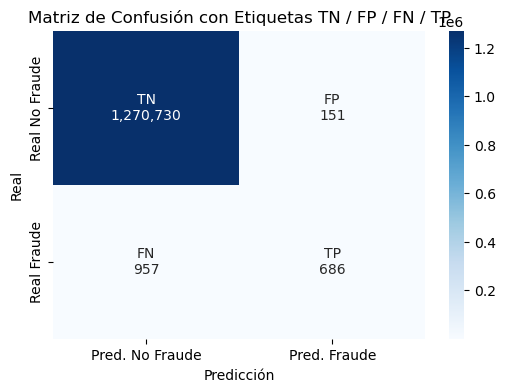

C:\Users\annau\AppData\Local\Temp\ipykernel_7116\2303587675.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=['skyblue','salmon'])


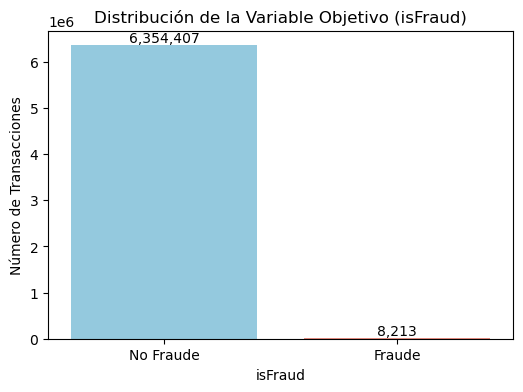

In [14]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_tree)

# Crear etiquetas personalizadas para cada celda
labels = np.array([
    ["TN\n{:,}".format(cm[0,0]), "FP\n{:,}".format(cm[0,1])],
    ["FN\n{:,}".format(cm[1,0]), "TP\n{:,}".format(cm[1,1])]
])

# Graficar con seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=True,
            xticklabels=['Pred. No Fraude', 'Pred. Fraude'],
            yticklabels=['Real No Fraude', 'Real Fraude'])

plt.title('Matriz de Confusión con Etiquetas TN / FP / FN / TP')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

# Contar frecuencia de cada clase
fraud_counts = y.value_counts()

# Crear gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=['skyblue','salmon'])

# Etiquetas y títulos
plt.xticks([0,1], ['No Fraude', 'Fraude'])
plt.ylabel('Número de Transacciones')
plt.title('Distribución de la Variable Objetivo (isFraud)')

# Mostrar valores encima de cada barra
for i, val in enumerate(fraud_counts.values):
    plt.text(i, val, f'{val:,}', ha='center', va='bottom', fontsize=10)

plt.show()

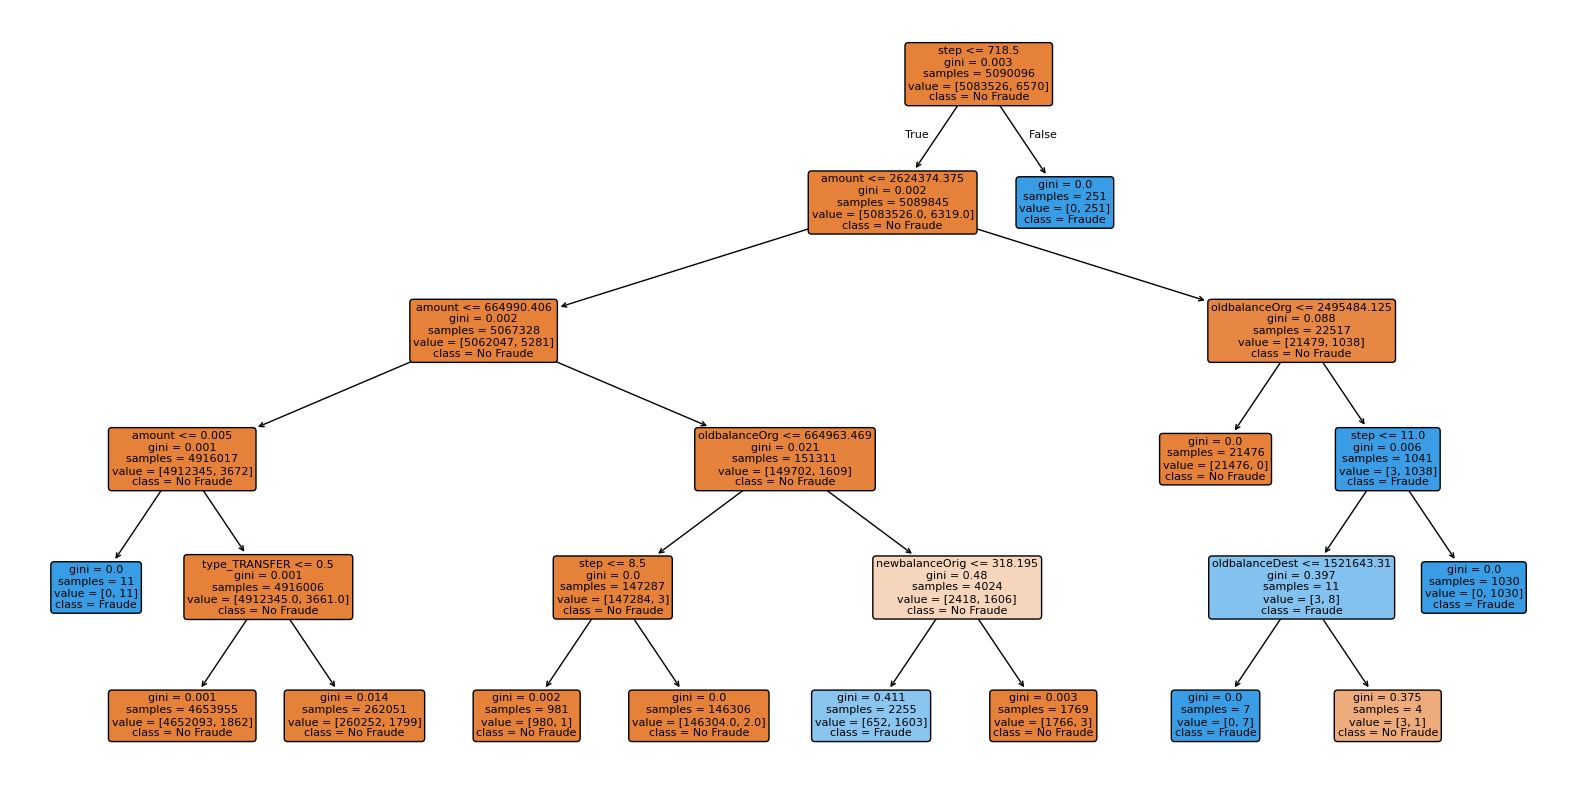

In [10]:
plt.figure(figsize=(20,10))  # Ajusta el tamaño para verlo mejor
plot_tree(
    tree_model,
    filled=True,            # Colores según la clase predicha
    feature_names=X.columns, # Nombres de las variables
    class_names=['No Fraude', 'Fraude'], 
    rounded=True, 
    fontsize=8
)
plt.show()

### 7.	Optimización (opcional)

En el análisis inicial se observó que, a pesar de obtener un accuracy muy alto, el modelo presentó dificultades para identificar fraudes, como se evidenció en la matriz de confusión y las gráficas generadas. Esto se debe al desbalance de la variable objetivo y al sobreajuste del árbol de decisión, que favorece la clase No Fraude. Por esta razón, a continuación se procederá a optimizar la data para mejorar la detección de fraudes y obtener resultados más representativos en el árbol de decisión.

#### Propuesta: **Entrenar un árbol de desición balanceado**
Para mejorar la detección de fraudes sin alterar el dataset, se propone entrenar un árbol de decisión balanceado usando class_weight='balanced' y limitar la profundidad del árbol, con el fin de reducir falsos negativos y mejorar el recall de la clase de fraude.

In [15]:
# Crear el árbol balanceado
tree_balanced = DecisionTreeClassifier(
    max_depth=5,              # Limitar profundidad para evitar sobreajuste
    min_samples_split=200,    # Requerir mínimo 200 muestras para dividir
    min_samples_leaf=100,     # Cada hoja al menos con 100 muestras
    class_weight='balanced',  # Ajusta pesos según el desbalance
    random_state=42
)

# Entrenar el modelo
tree_balanced.fit(X_train, y_train)

# Predicciones
y_pred_balanced = tree_balanced.predict(X_test)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_balanced))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_balanced))

Accuracy: 0.9866760862663494

Matriz de Confusión:
 [[1253990   16891]
 [     64    1579]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99   1270881
           1       0.09      0.96      0.16      1643

    accuracy                           0.99   1272524
   macro avg       0.54      0.97      0.58   1272524
weighted avg       1.00      0.99      0.99   1272524



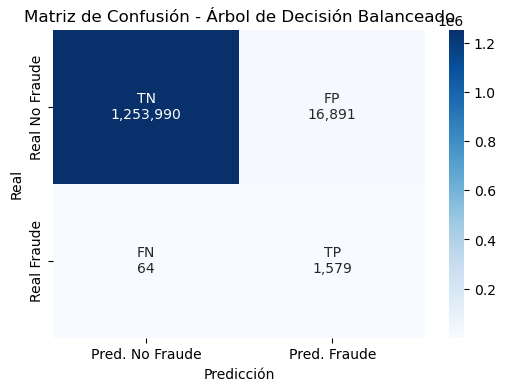

In [16]:
# Matriz de confusión
cm_balanced = confusion_matrix(y_test, y_pred_balanced)

# Crear etiquetas personalizadas TN, FP, FN, TP
labels = np.array([
    ["TN\n{:,}".format(cm_balanced[0,0]), "FP\n{:,}".format(cm_balanced[0,1])],
    ["FN\n{:,}".format(cm_balanced[1,0]), "TP\n{:,}".format(cm_balanced[1,1])]
])

# Graficar
plt.figure(figsize=(6,4))
sns.heatmap(cm_balanced, annot=labels, fmt='', cmap='Blues', cbar=True,
            xticklabels=['Pred. No Fraude', 'Pred. Fraude'],
            yticklabels=['Real No Fraude', 'Real Fraude'])

plt.title('Matriz de Confusión - Árbol de Decisión Balanceado')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

El análisis de los resultados muestra que el árbol de decisión balanceado logró incrementar notablemente la detección de fraudes, reduciendo los falsos negativos de 957 a 64, lo que indica un recall cercano al 96% para la clase de fraude. Sin embargo, este ajuste provocó un aumento significativo de falsos positivos, pasando de 151 a 16,891, lo que implica que muchas transacciones legítimas son clasificadas erróneamente como fraude. Esta situación evidencia un trade-off entre sensibilidad y precisión. En la búsqueda de un punto intermedio entre alta detección de fraudes y menor cantidad de falsas alarmas, para el siguiente paso se consideró aplicar undersampling parcial de la clase mayoritaria. Se opta por que sea parcial para reducir la desproporción extrema sin eliminar en exceso transacciones legítimas, conservando la diversidad de patrones de la clase No Fraude y evitando pérdida de información valiosa para el modelo.

#### Propuesta: **Aplicar undersampling parcial**
Con este enfoque se busca equilibrar parcialmente las clases, permitiendo que el árbol aprenda más patrones de fraude sin generar tantos falsos positivos como con el modelo balanceado completo.



Tamaño del dataset tras undersampling parcial: (208213, 11)
Distribución de clases:
 isFraud
0    200000
1      8213
Name: count, dtype: int64


C:\Users\annau\AppData\Local\Temp\ipykernel_7116\4196481995.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts_partial.index,


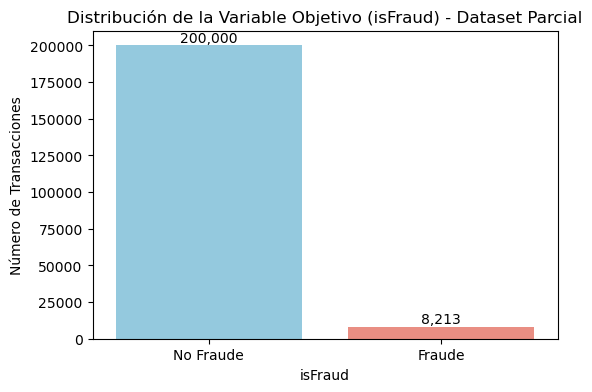

In [21]:
# Unir X e y para muestreo
df_full = X.copy()
df_full['isFraud'] = y

# Separar clases
df_no_fraud = df_full[df_full['isFraud'] == 0]
df_fraud = df_full[df_full['isFraud'] == 1]

# Undersampling parcial de la clase mayoritaria
df_no_fraud_downsampled = resample(
    df_no_fraud,
    replace=False,
    n_samples=200000,   # Se elige un tamaño intermedio (ajustable)
    random_state=42
)

# Unir nuevamente fraudes y no fraudes muestreados
df_balanced_partial = pd.concat([df_no_fraud_downsampled, df_fraud])

# Separar X e y
X_partial = df_balanced_partial.drop('isFraud', axis=1)
y_partial = df_balanced_partial['isFraud']

# Dividir en train/test
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_partial, y_partial, test_size=0.2, random_state=42, stratify=y_partial
)

print("Tamaño del dataset tras undersampling parcial:", X_partial.shape)
print("Distribución de clases:\n", y_partial.value_counts())

# Contar frecuencia de cada clase en el dataset tras undersampling parcial
fraud_counts_partial = y_partial.value_counts()

# Crear gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts_partial.index, 
            y=fraud_counts_partial.values, 
            palette=['skyblue','salmon'])

# Etiquetas y títulos
plt.xticks([0,1], ['No Fraude', 'Fraude'])
plt.ylabel('Número de Transacciones')
plt.title('Distribución de la Variable Objetivo (isFraud) - Dataset Parcial')

# Mostrar valores encima de cada barra
for i, val in enumerate(fraud_counts_partial.values):
    plt.text(i, val, f'{val:,}', ha='center', va='bottom', fontsize=10)

plt.show()


Accuracy: 0.9873448118531326

Matriz de Confusión:
 [[39818   182]
 [  345  1298]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     40000
           1       0.88      0.79      0.83      1643

    accuracy                           0.99     41643
   macro avg       0.93      0.89      0.91     41643
weighted avg       0.99      0.99      0.99     41643



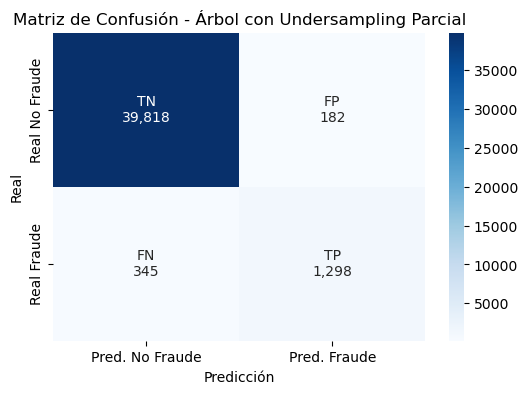

In [23]:
# Crear el árbol de decisión para dataset parcial
tree_partial = DecisionTreeClassifier(
    max_depth=5,              
    min_samples_split=200,    
    min_samples_leaf=100,     
    random_state=42
)

# Entrenar con dataset parcialmente balanceado
tree_partial.fit(X_train_p, y_train_p)

# Predicciones
y_pred_partial = tree_partial.predict(X_test_p)

# Evaluación
accuracy_partial = accuracy_score(y_test_p, y_pred_partial)
cm_partial = confusion_matrix(y_test_p, y_pred_partial)
report_partial = classification_report(y_test_p, y_pred_partial)

print("Accuracy:", accuracy_partial)
print("\nMatriz de Confusión:\n", cm_partial)
print("\nReporte de Clasificación:\n", report_partial)


# Crear etiquetas TN, FP, FN, TP
labels_partial = np.array([
    ["TN\n{:,}".format(cm_partial[0,0]), "FP\n{:,}".format(cm_partial[0,1])],
    ["FN\n{:,}".format(cm_partial[1,0]), "TP\n{:,}".format(cm_partial[1,1])]
])

# Graficar matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm_partial, annot=labels_partial, fmt='', cmap='Blues', cbar=True,
            xticklabels=['Pred. No Fraude', 'Pred. Fraude'],
            yticklabels=['Real No Fraude', 'Real Fraude'])

plt.title('Matriz de Confusión - Árbol con Undersampling Parcial')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()


El análisis de los tres enfoques aplicados al árbol de decisión evidencia que el modelo original mantiene un accuracy muy alto pero con baja detección de fraudes, el árbol balanceado maximiza el recall de fraudes a costa de generar muchas alertas falsas, y el undersampling parcial logra un equilibrio más estable entre recall y precisión, reduciendo falsos positivos sin perder demasiada capacidad de detección. Si bien se mejoró la interpretación de la data y la identificación de fraudes, aún se puede optimizar ajustando hiperparámetros como la profundidad, el número mínimo de muestras por nodo y el criterio de división, lo que permitiría reducir sobreajuste y mejorar la capacidad predictiva antes de avanzar hacia modelos más robustos como Random Forest.

#### Propuesta: **Optimizar hiperparámetros**
En esta sección se busca optimizar hiperparámetros para mejorar el rendimiento y la generalización del árbol de decisión, evitando que el modelo sobreajuste o que sea demasiado simple. Se ajustarán parámetros como profundidad máxima (max_depth), mínimo de muestras para dividir (min_samples_split), mínimo de muestras por hoja (min_samples_leaf) y el criterio de división (gini o entropy), buscando la mejor combinación mediante GridSearchCV.



In [25]:
# Definir el modelo base
tree_model_opt = DecisionTreeClassifier(random_state=42)

# Definir los hiperparámetros a probar
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [50, 100, 200],
    'min_samples_leaf': [20, 50, 100],
    'criterion': ['gini', 'entropy']
}

# Configurar GridSearchCV (búsqueda exhaustiva con validación cruzada)
grid_search = GridSearchCV(
    estimator=tree_model_opt,
    param_grid=param_grid,
    scoring='f1',     # Se prioriza F1 para la clase minoritaria
    cv=3,             # Validación cruzada
    n_jobs=-1,        # Usar todos los núcleos disponibles
    verbose=1
)

# Ajustar la búsqueda usando el dataset parcialmente balanceado
grid_search.fit(X_train_p, y_train_p)

# Mostrar los mejores parámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación F1 obtenida:", grid_search.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 50}
Mejor puntuación F1 obtenida: 0.9148776642305458


Mejores hiperparámetros encontrados: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 50}
Accuracy final: 0.9943567946593665

Matriz de Confusión:
 [[39941    59]
 [  176  1467]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     40000
           1       0.96      0.89      0.93      1643

    accuracy                           0.99     41643
   macro avg       0.98      0.95      0.96     41643
weighted avg       0.99      0.99      0.99     41643



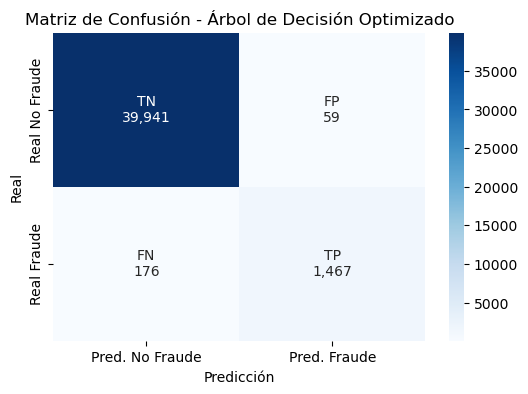

In [27]:
# Obtener los mejores hiperparámetros de GridSearchCV
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

# Crear y entrenar el árbol optimizado
tree_final = DecisionTreeClassifier(**best_params, random_state=42)
tree_final.fit(X_train_p, y_train_p)

# Predicciones
y_pred_final = tree_final.predict(X_test_p)

# Evaluación final
cm_final = confusion_matrix(y_test_p, y_pred_final)
accuracy_final = accuracy_score(y_test_p, y_pred_final)
report_final = classification_report(y_test_p, y_pred_final)

print("Accuracy final:", accuracy_final)
print("\nMatriz de Confusión:\n", cm_final)
print("\nReporte de Clasificación:\n", report_final)

# Crear etiquetas TN, FP, FN, TP para la matriz final
labels_final = np.array([
    ["TN\n{:,}".format(cm_final[0,0]), "FP\n{:,}".format(cm_final[0,1])],
    ["FN\n{:,}".format(cm_final[1,0]), "TP\n{:,}".format(cm_final[1,1])]
])

# Graficar la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm_final, annot=labels_final, fmt='', cmap='Blues', cbar=True,
            xticklabels=['Pred. No Fraude', 'Pred. Fraude'],
            yticklabels=['Real No Fraude', 'Real Fraude'])

plt.title('Matriz de Confusión - Árbol de Decisión Optimizado')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()



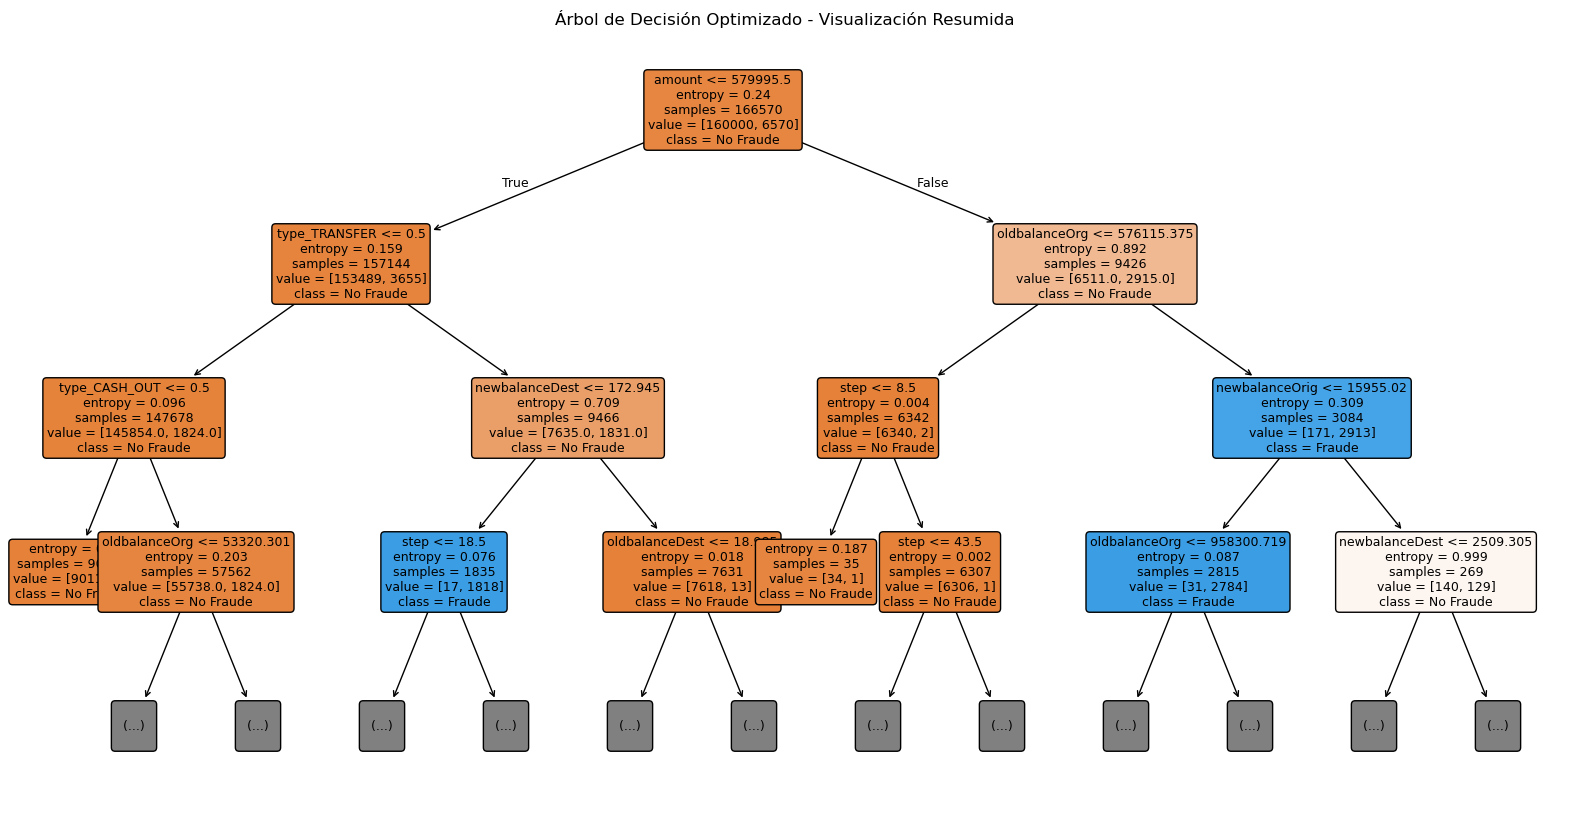

In [34]:
plt.figure(figsize=(20,10))
plot_tree(
    tree_final,
    max_depth=3,               # Limita la visualización a 3 niveles
    filled=True,
    feature_names=X_train_p.columns,
    class_names=['No Fraude','Fraude'],
    rounded=True,
    fontsize=9
)
plt.title('Árbol de Decisión Optimizado - Visualización Resumida')
plt.show()


El árbol de decisión optimizado alcanzó un accuracy de 0.994, con un recall de 0.89 y F1-score de 0.93 para la clase de fraude, logrando un mejor equilibrio entre detección de fraudes y reducción de falsas alarmas vs el análisis inicial. La matriz de confusión muestra 39,941 transacciones normales correctamente clasificadas, 59 falsas alarmas, 1,467 fraudes detectados y 176 fraudes no identificados, lo que evidencia una mejor generalización respecto a los modelos previos y confirma que la optimización de hiperparámetros redujo el sobreajuste, manteniendo la capacidad predictiva.

### Conclusión
El desarrollo del árbol de decisión permitió clasificar transacciones como fraudulentas o no fraudulentas, evaluando distintos enfoques de preprocesamiento y balanceo de datos. Se comprobó que el modelo original presentaba alta precisión pero baja detección de fraudes, mientras que el uso de class_weight incrementó significativamente el recall, aunque con un aumento considerable de falsas alarmas. Posteriormente, el undersampling parcial combinado con la optimización de hiperparámetros logró el mejor equilibrio entre precisión y sensibilidad, alcanzando un accuracy de 0.994, recall de 0.89 y F1-score de 0.93 para fraudes. Además, el análisis del árbol identificó que variables como amount, oldbalanceOrg y el tipo de transacción (TRANSFER y CASH_OUT) son las más relacionadas con la detección de fraudes, cumpliendo así el objetivo de obtener un modelo predictivo e interpretable.

## Task 2 – Random Forest

### 1.	Preparación del entorno e Importar las bibliotecas necesarias

### 3.	Cargar el conjunto de datos y  4.	Preprocesamiento de datos

In [42]:
# Cargar el dataset
df_rf = pd.read_csv("onlinefraud.csv")

# a. Eliminar columnas irrelevantes
df_rf = df_rf.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

# b. Convertir variables categóricas con One-Hot Encoding
df_rf = pd.get_dummies(df_rf, columns=['type'], drop_first=True)

# c. Separar variables independientes (X) y variable objetivo (y)
X_rf = df_rf.drop('isFraud', axis=1)
y_rf = df_rf['isFraud']

# d. Dividir en entrenamiento y prueba (80/20)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y_rf, test_size=0.2, random_state=42, stratify=y_rf
)

print("Tamaño de entrenamiento:", X_train_rf.shape)
print("Tamaño de prueba:", X_test_rf.shape)
print("Distribución de la variable objetivo:\n", y_rf.value_counts())


KeyboardInterrupt: 

### 5.	Entrenar el modelo

In [37]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=50,
    min_samples_leaf=20,
    random_state=42,
    n_jobs=-1
)

# Entrenar modelo
rf_model.fit(X_train_rf, y_train_rf)


RandomForestClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=50,
                       n_jobs=-1, random_state=42)

### 6.	Evaluar el modelo

In [38]:
# Predicciones
y_pred_rf = rf_model.predict(X_test_rf)

# Métricas de rendimiento
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)
report_rf = classification_report(y_test_rf, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("\nMatriz de Confusión:\n", cm_rf)
print("\nReporte de Clasificación:\n", report_rf)


Accuracy: 0.9996448004124088

Matriz de Confusión:
 [[1270872       9]
 [    443    1200]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.99      0.73      0.84      1643

    accuracy                           1.00   1272524
   macro avg       1.00      0.87      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



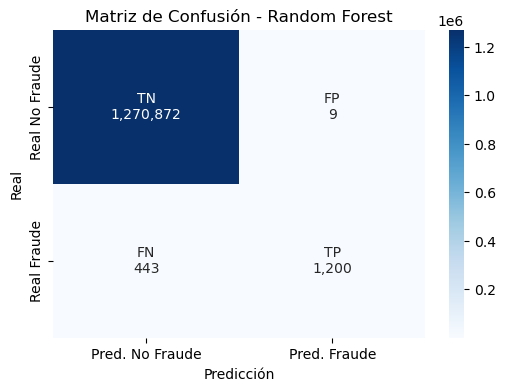

In [39]:
labels_rf = np.array([
    ["TN\n{:,}".format(cm_rf[0,0]), "FP\n{:,}".format(cm_rf[0,1])],
    ["FN\n{:,}".format(cm_rf[1,0]), "TP\n{:,}".format(cm_rf[1,1])]
])

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=labels_rf, fmt='', cmap='Blues', cbar=True,
            xticklabels=['Pred. No Fraude', 'Pred. Fraude'],
            yticklabels=['Real No Fraude', 'Real Fraude'])

plt.title('Matriz de Confusión - Random Forest')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()


- Random Forest generaliza mejor, mantiene alta precisión y reduce drásticamente los falsos positivos.

- Su recall (0.73) es menor que el del árbol optimizado con undersampling y ajuste (0.89), porque el bosque prefiere no marcar falsos fraudes.

- En contextos de fraude, puede ser deseable ajustar el umbral o los hiperparámetros para incrementar recall si se prioriza capturar más fraudes aunque haya más alertas falsas.

### 7.	Optimización (opcional) y 	Evitar sobreajuste

In [40]:
# Definir el modelo base
rf_model_opt = RandomForestClassifier(random_state=42, n_jobs=-1)

# Definir la rejilla de hiperparámetros a probar
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [8, 10, 12],
    'min_samples_split': [20, 50, 100],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['gini', 'entropy']
}

# Configurar GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_model_opt,
    param_grid=param_grid_rf,
    scoring='f1',    # Optimiza F1-score de la clase minoritaria
    cv=3,
    n_jobs=-1,
    verbose=2
)

# Ajustar la búsqueda
grid_search_rf.fit(X_train_rf, y_train_rf)

# Mostrar los mejores parámetros y el mejor puntaje
print("Mejores hiperparámetros:", grid_search_rf.best_params_)
print("Mejor F1-score:", grid_search_rf.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


KeyboardInterrupt: 

In [ ]:
# Entrenar modelo final con los mejores parámetros
best_params_rf = grid_search_rf.best_params_
rf_final = RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=-1)
rf_final.fit(X_train_rf, y_train_rf)

# Predicciones
y_pred_rf_final = rf_final.predict(X_test_rf)

# Métricas finales
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm_rf_final = confusion_matrix(y_test_rf, y_pred_rf_final)
accuracy_rf_final = accuracy_score(y_test_rf, y_pred_rf_final)
report_rf_final = classification_report(y_test_rf, y_pred_rf_final)

print("Accuracy final:", accuracy_rf_final)
print("\nMatriz de Confusión:\n", cm_rf_final)
print("\nReporte de Clasificación:\n", report_rf_final)

# Crear etiquetas TN / FP / FN / TP
labels_rf_final = np.array([
    ["TN\n{:,}".format(cm_rf_final[0,0]), "FP\n{:,}".format(cm_rf_final[0,1])],
    ["FN\n{:,}".format(cm_rf_final[1,0]), "TP\n{:,}".format(cm_rf_final[1,1])]
])

# Graficar matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf_final, annot=labels_rf_final, fmt='', cmap='Blues', cbar=True,
            xticklabels=['Pred. No Fraude', 'Pred. Fraude'],
            yticklabels=['Real No Fraude', 'Real Fraude'])

plt.title('Matriz de Confusión - Random Forest Optimizado')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()


### Conclusiones
